# Lab 5: EDA with Dimensionality Reduction
RJ Nowling

In this lab, we are going to explore the relationships between email messages.  We will need to first convert the text data into numeric features.  When done, we will have too many features to analyze each variable separately, so we'll apply dimensionality reduction techniques.

In [1]:
import glob
import json

import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN

## Part I: Load Data

Each email is stored in a separate JSON document.  Each email has five fields: category (ham or spam), to_address, from_address, subject, and body.  We'll need to load these into a single DataFrame.

```
{
  "category": "ham",
  "to_address": "debian-mirrors@lists.debian.org",
  "from_address": "Yan Morin <yan.morin@savoirfairelinux.com>",
  "subject": "Typo in /debian/README",
  "body": "Hi, i've just updated from the gulus and I check on other mirrors.\nIt seems there is a little typo in /debian/README file\n\nExample:\nhttp://gulus.usherbrooke.ca/debian/README\nftp://ftp.fr.debian.org/debian/README\n\n\"Testing, or lenny.  Access this release through dists/testing.  The\ncurrent tested development snapshot is named etch.  Packages which\nhave been tested in unstable and passed automated tests propogate to\nthis release.\"\n\netch should be replace by lenny like in the README.html\n\n\n\n-- \nYan Morin\nConsultant en logiciel libre\nyan.morin@savoirfairelinux.com\n514-994-1556\n\n\n-- \nTo UNSUBSCRIBE, email to debian-mirrors-REQUEST@lists.debian.org\nwith a subject of \"unsubscribe\". Trouble? Contact listmaster@lists.debian.org\n\n"
}
```

In [2]:
records = []
for flname in glob.glob("email_json/message_*.json"):
    with open(flname) as fl:
        email = json.load(fl)
        records.append(email)

print("Loaded", len(records), "emails")

Loaded 63542 emails


In [3]:
df = pd.DataFrame.from_dict(records)

df.head()

,category,to_address,from_address,subject,body
0,spam,smile@speedy.uwaterloo.ca,Pablo Timmons <SophiRosemary4926@yahoo.com>,Software Compatibility....ain't it great?,\n\n\n\n\n\n\n\n\n\n\n\n\nLove works a differe...
1,spam,"""gnitpick"" <gnitpick@speedy.uwaterloo.ca>","""Inez Tanner"" <ocuseethed@executiveemail.com>",At which bookshelves,This one will explode\nSpecial Situation Alert...
2,spam,catchall@flax9.uwaterloo.ca,"""Joar Moree"" <Joar@arslanzade.com>",It's just like Raistlin described to me once.,"\n\n\n\n\n\nSee "" String Instructions"" on page..."
3,spam,the00@plg2.math.uwaterloo.ca,bass Elkins <Gailk@waydelivery.com>,Have in mixture,\n\n\n\n\n\n\n\neasy to think of all the possi...
4,spam,manager@speedy.uwaterloo.ca,Works Fast <kmamie@netcityhk.com>,Benefits of Cialis,\n\n\n\n\n\nCialis will boost up your erection...


## Part II: Extract Features

We want to create numerical features from the message bodies.  We'll use Scikit Learn's CountVectorizer for this.  Each column in the feature matrix will store the counts for a single word.

In [4]:
vec = CountVectorizer(binary=True, min_df=10)

features = vec.fit_transform(df["body"])

print(type(features), features.shape, features.nnz)

<class 'scipy.sparse.csr.csr_matrix'> (63542, 32144) 6388795


In [5]:
print(list(vec.vocabulary_)[:10])

['love', 'works', 'different', 'way', 'in', 'minds', 'the', 'fool', 'it', 'enlightens']


In [6]:
love_idx = vec.vocabulary_["love"]
works_idx = vec.vocabulary_["works"]
different_idx = vec.vocabulary_["different"]

print(love_idx, works_idx, different_idx)

18037 31687 10151


In [7]:
print(features[:, love_idx])

  (0, 0)	1
  (10, 0)	1
  (73, 0)	1
  (80, 0)	1
  (83, 0)	1
  (138, 0)	1
  (146, 0)	1
  (162, 0)	1
  (165, 0)	1
  (256, 0)	1
  (271, 0)	1
  (279, 0)	1
  (319, 0)	1
  (338, 0)	1
  (345, 0)	1
  (357, 0)	1
  (360, 0)	1
  (436, 0)	1
  (446, 0)	1
  (471, 0)	1
  (476, 0)	1
  (488, 0)	1
  (502, 0)	1
  (517, 0)	1
  (536, 0)	1
  :	:
  (62725, 0)	1
  (62730, 0)	1
  (62732, 0)	1
  (62774, 0)	1
  (62780, 0)	1
  (62791, 0)	1
  (62812, 0)	1
  (62822, 0)	1
  (62953, 0)	1
  (62954, 0)	1
  (62973, 0)	1
  (62993, 0)	1
  (63001, 0)	1
  (63002, 0)	1
  (63012, 0)	1
  (63043, 0)	1
  (63088, 0)	1
  (63143, 0)	1
  (63163, 0)	1
  (63390, 0)	1
  (63445, 0)	1
  (63457, 0)	1
  (63490, 0)	1
  (63509, 0)	1
  (63522, 0)	1


In [8]:
print(features[:, works_idx])

  (0, 0)	1
  (4, 0)	1
  (60, 0)	1
  (67, 0)	1
  (73, 0)	1
  (88, 0)	1
  (119, 0)	1
  (143, 0)	1
  (166, 0)	1
  (186, 0)	1
  (191, 0)	1
  (193, 0)	1
  (207, 0)	1
  (308, 0)	1
  (314, 0)	1
  (332, 0)	1
  (364, 0)	1
  (409, 0)	1
  (411, 0)	1
  (415, 0)	1
  (432, 0)	1
  (460, 0)	1
  (476, 0)	1
  (490, 0)	1
  (503, 0)	1
  :	:
  (63037, 0)	1
  (63059, 0)	1
  (63085, 0)	1
  (63116, 0)	1
  (63152, 0)	1
  (63211, 0)	1
  (63225, 0)	1
  (63241, 0)	1
  (63249, 0)	1
  (63302, 0)	1
  (63327, 0)	1
  (63341, 0)	1
  (63357, 0)	1
  (63374, 0)	1
  (63387, 0)	1
  (63390, 0)	1
  (63407, 0)	1
  (63411, 0)	1
  (63428, 0)	1
  (63442, 0)	1
  (63466, 0)	1
  (63473, 0)	1
  (63477, 0)	1
  (63491, 0)	1
  (63504, 0)	1


In [9]:
print(features[:, different_idx])

  (0, 0)	1
  (3, 0)	1
  (19, 0)	1
  (26, 0)	1
  (46, 0)	1
  (67, 0)	1
  (73, 0)	1
  (79, 0)	1
  (125, 0)	1
  (143, 0)	1
  (144, 0)	1
  (163, 0)	1
  (165, 0)	1
  (175, 0)	1
  (181, 0)	1
  (337, 0)	1
  (387, 0)	1
  (409, 0)	1
  (423, 0)	1
  (433, 0)	1
  (489, 0)	1
  (503, 0)	1
  (515, 0)	1
  (518, 0)	1
  (525, 0)	1
  :	:
  (63105, 0)	1
  (63107, 0)	1
  (63118, 0)	1
  (63133, 0)	1
  (63151, 0)	1
  (63191, 0)	1
  (63215, 0)	1
  (63221, 0)	1
  (63222, 0)	1
  (63267, 0)	1
  (63276, 0)	1
  (63287, 0)	1
  (63318, 0)	1
  (63328, 0)	1
  (63353, 0)	1
  (63366, 0)	1
  (63371, 0)	1
  (63390, 0)	1
  (63394, 0)	1
  (63413, 0)	1
  (63416, 0)	1
  (63438, 0)	1
  (63455, 0)	1
  (63470, 0)	1
  (63505, 0)	1


## Part III: Dimensionality Reduction with SVD

300,984 variables is way too many to look at by hand.  We'll use SVD to reduce the dimensionality of the matrix.  Like PCA, SVD uses correlation between variables to group them and created a smaller set of variables.

In [10]:
svd = TruncatedSVD(n_components=10)
proj = svd.fit_transform(features)

Text(0, 0.5, 'Explained Varianace Ratio')

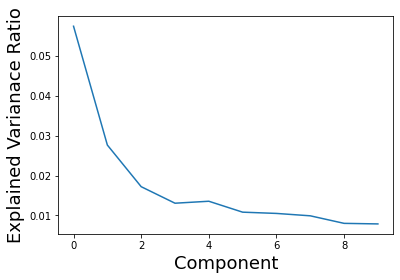

In [11]:
plt.plot(svd.explained_variance_ratio_)
plt.xlabel("Component", fontsize=18)
plt.ylabel("Explained Varianace Ratio", fontsize=18)

The first two components (indices 0 and 1) capture most of the variation.  We will visualize the relationships between these two components.

## Part IV: Visualization

Text(0, 0.5, 'Component 1')

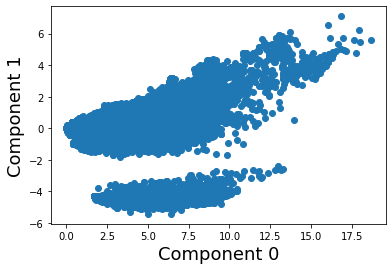

In [12]:
plt.scatter(proj[:, 0], proj[:, 1])
plt.xlabel("Component 0", fontsize=18)
plt.ylabel("Component 1", fontsize=18)

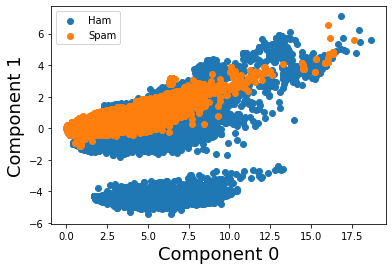

In [13]:
mask = df["category"] == "ham"
plt.scatter(proj[mask, 0], proj[mask, 1], label="Ham")
mask = df["category"] == "spam"
plt.scatter(proj[mask, 0], proj[mask, 1], label="Spam")
plt.xlabel("Component 0", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.legend()

## Part II: Clustering

We are going to cluster the emails along SVD components 0 and 1.  Clustering tries to label the points so that points in the same cluster are closer to each other than points in different clusters.

In [14]:
dbscan = DBSCAN(eps=0.5)
cluster_labels = dbscan.fit_predict(proj[:, :2])

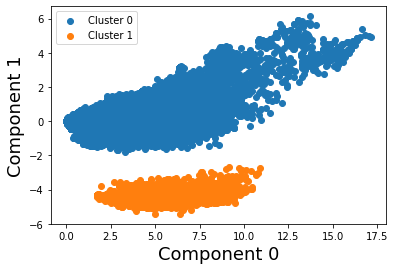

In [15]:
mask = cluster_labels == 0
plt.scatter(proj[mask, 0], proj[mask, 1], label="Cluster 0")
mask = cluster_labels == 1
plt.scatter(proj[mask, 0], proj[mask, 1], label="Cluster 1")
plt.xlabel("Component 0", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.legend()

## Part III: Cluster-Associated Words

In [16]:
mask_0 = cluster_labels == 0
mask_1 = cluster_labels == 1

features_0 = features[mask_0, :].tocsc()
features_1 = features[mask_1, :].tocsc()

In [17]:
doc_freq_0 = features_0.sum(axis=0)
doc_freq_1 = features_1.sum(axis=0)

print(doc_freq_0.shape, doc_freq_1.shape)
print(doc_freq_0[0, love_idx], doc_freq_0[0, works_idx], doc_freq_0[0, different_idx])
print(doc_freq_1[0, love_idx], doc_freq_1[0, works_idx], doc_freq_1[0, different_idx])

(1, 32144) (1, 32144)
2013 2367 2086
23 629 779


In [18]:
cluster_1_expected_prob = doc_freq_1[0, works_idx] / features_1.shape[0]
print("Cluster 1:", cluster_1_expected_prob)
cluster_0_expected_prob = doc_freq_0[0, works_idx] / features_0.shape[0]
print("Cluster 0:", cluster_0_expected_prob)

pvalue = stats.binom_test(doc_freq_0[0, works_idx], features_0.shape[0], cluster_1_expected_prob, alternative="greater")
print("p-value:", pvalue)

Cluster 1: 0.10882352941176471
Cluster 0: 0.04100334332288184
p-value: 0.9999999999999999


In [19]:
cluster_1_expected_prob = doc_freq_1[0, love_idx] / features_1.shape[0]
print("Cluster 1:", cluster_1_expected_prob)
cluster_0_expected_prob = doc_freq_0[0, love_idx] / features_0.shape[0]
print("Cluster 0:", cluster_0_expected_prob)

pvalue = stats.binom_test(doc_freq_0[0, love_idx], features_0.shape[0], cluster_1_expected_prob, alternative="greater")
print("p-value:", pvalue)

Cluster 1: 0.00397923875432526
Cluster 0: 0.03487103088676009
p-value: 0.0


In [20]:
cluster_0_list = []
for word, idx in vec.vocabulary_.items():
    cluster_1_expected_prob = doc_freq_1[0, idx] / features_1.shape[0]
    pvalue = stats.binom_test(doc_freq_0[0, idx], features_0.shape[0], cluster_1_expected_prob, alternative="greater")
    
    if pvalue < 0.05:
        cluster_0_list.append((pvalue, word, doc_freq_0[0, idx]))

cluster_0_list.sort()

In [24]:
print("Top 200 words for cluster 0:")
count = 1
for pvalue, word, doc_freq in cluster_0_list:
    if word.isalpha():
        print(word, doc_freq, pvalue)
        count +=1
        
    if count == 200:
        break

Top 200 words for cluster 0:
aacs 16 0.0
aback 10 0.0
abandoning 13 0.0
abartlet 166 0.0
abated 58 0.0
abating 29 0.0
abba 18 0.0
abbas 30 0.0
abbott 71 0.0
abducted 13 0.0
abduction 13 0.0
abdul 24 0.0
abe 18 0.0
abecedarian 23 0.0
aber 186 0.0
abfao 37 0.0
abflauen 12 0.0
abgeschlossen 21 0.0
abhorred 123 0.0
abiding 24 0.0
abilities 64 0.0
abiword 13 0.0
ablaze 13 0.0
ableton 577 0.0
abnormal 14 0.0
aboard 59 0.0
abode 24 0.0
abominable 13 0.0
abortion 78 0.0
abortions 15 0.0
abound 14 0.0
abroad 211 0.0
abrupt 12 0.0
abruptly 81 0.0
absently 11 0.0
absentminded 11 0.0
absorbs 11 0.0
absorption 28 0.0
abstracted 21 0.0
abstraction 39 0.0
absurd 33 0.0
absurdity 10 0.0
absurdly 12 0.0
abundantly 13 0.0
abused 23 0.0
abuses 24 0.0
abusing 18 0.0
abusive 16 0.0
abwicklung 22 0.0
academics 28 0.0
academy 406 0.0
acapsite 51 0.0
accedi 22 0.0
accelerate 29 0.0
accelerating 23 0.0
acceleration 395 0.0
accelerator 20 0.0
acceptances 12 0.0
accesd 124 0.0
accessibility 120 0.0
accessor 12 0

In [25]:
cluster_1_list = []
for word, idx in vec.vocabulary_.items():
    cluster_0_expected_prob = doc_freq_0[0, idx] / features_0.shape[0]
    pvalue = stats.binom_test(doc_freq_1[0, idx], features_1.shape[0], cluster_0_expected_prob, alternative="greater")
    
    if pvalue < 0.05:
        cluster_1_list.append((pvalue, word, doc_freq_1[0, idx]))

cluster_1_list.sort()

In [26]:
print("Top 200 words for cluster 1:")
count = 1
for pvalue, word, doc_freq  in cluster_1_list:
    if word.isalpha():
        print(word, doc_freq)
        count +=1
        
    if count == 200:
        break

Top 200 words for cluster 1:
abline 65
ac 558
acafs 36
adai 21
adaikalavan 11
adschai 65
advance 618
affymetrix 11
agingandhealth 50
alin 40
alternative 1502
am 2212
amicogodzilla 10
and 5768
andrewpr 11
annis 11
anova 131
anup 28
any 2086
anyone 755
aov 46
archive 481
arima 16
autocorrelation 17
autoregressive 10
axis 240
banyu 10
barata 11
barplot 40
barplots 13
batchfiles 15
bayesianfilter 18
bendix 10
bengtsson 13
benilton 24
bfgs 48
bhagavad 12
bic 42
biddle 10
biglm 10
biobase 18
biocomputing 10
bioconductor 64
bioinformation 11
biometrie 22
biostat 145
biostatistical 44
biostatistician 27
biostatistics 177
biplot 25
biplots 12
bivand 24
bivariate 34
blas 11
blomberg 29
bolker 26
bosonderzoek 19
bothell 14
bounces 534
boxplot 54
boxplots 27
brian 438
brutschy 10
bty 14
but 3399
byrow 44
calboli 11
can 3010
carstensen 10
causas 35
cberry 41
cbind 222
ccil 14
ccilindia 16
cedex 10
cex 59
cezar 13
ch 5780
charilaos 17
chiruka 23
chisq 23
chm 17
cholesky 12
christos 17
clipplot 10
cm